# Getting some style: fantasy maps

Our objective today: make a stylized map of Middle Earth that's similar to those in the front pages of the books.
I saw [this map of Middle Earth](https://www.r-bloggers.com/interactive-and-styled-middle-earth-map/) made with R, and being a Pythonist, felt that the gauntlet had been thrown down.

It's pretty easy to map geography with Geopandas or Matplotlib, but styling it to look the way you want can take you deep into the weeds of documentation. But that's where we're going today. Let's check out what we've got using Geopandas.

In [1]:
import geopandas
import numpy as np
import fiona
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

I'm keeping the repository in a separate folder dedicated to datasets, but you can clone the repository at https://github.com/jvangeld/ME-GIS.

In [55]:
path = '../../datamancery/geo/ME-GIS-master/'
coasts =  geopandas.read_file(path + 'Coastline2.shp')
contours =geopandas.read_file(path + 'Contours_18.shp')
contours2=geopandas.read_file(path + 'HelperContours.shp')
cities =  geopandas.read_file(path + 'Cities.shp')
forests = geopandas.read_file(path + 'Forests.shp')
towns =   geopandas.read_file(path + 'Towns.shp')
lakes =   geopandas.read_file(path + 'Lakes2.shp')
rivers =  geopandas.read_file(path + 'Rivers19.shp')
roads =   geopandas.read_file(path + 'PrimaryRoads.shp')

In [3]:
cities.sample(5)

GM_LAYER GM_TYPE LAYER         Name  \
17     City    City  City   Dol Guldur   
6      City    City  City  Helm's Deep   
16     City    City  City   Dol Amroth   
22     City    City  City     Morannon   
5      City    City  City      Tharbad   

                                       geometry  
17  POINT (1071013.730837432 929616.5865869542)  
6   POINT (805414.8713741328 748074.0261582941)  
16   POINT (981313.841584124 529840.7410166308)  
22   POINT (1180634.357018766 720624.526880509)  
5   POINT (656349.9260703687 901067.9533841792)

Let's look at the simplest possible map of all these elements, with no styling.

In [42]:
contours.sample()

NAME                     GM_LAYER                      GM_TYPE  \
3362  Lake 84 shore  Contour Line, Supplementary  Contour Line, Supplementary   

     LAYER    ID Elevation  Colour LENGTH BEARING PERIMETER ENCLOSED_A  \
3362  None  None      9030     NaN   None    None      None       None   

      1_8288_met ISLAND_ARE                                           geometry  
3362         NaN       None  LINESTRING (937385.4999634849 1166383.40369151...

In [60]:
contours['Elevation'] = contours['Elevation'].fillna('0')

In [61]:
contours['Elevation'] = contours['Elevation'].map(lambda elv: float(elv.replace('m', '')))

In [105]:
contours.Elevation.value_counts().head()

5486.40    446
5480.00    220
5505.45    198
5500.00    174
5460.00    122
Name: Elevation, dtype: int64

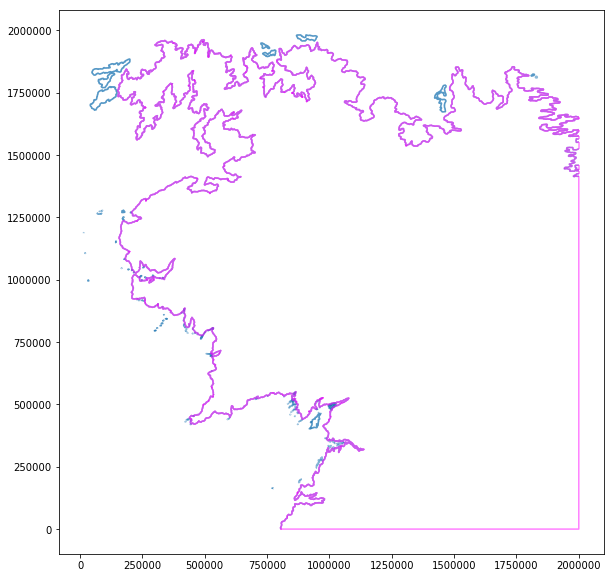

In [110]:
base = contours[contours.Elevation == 5486.4].plot(figsize=(10,10), alpha=0.5)
coasts.plot(ax=base, alpha=0.5, color="magenta")

In [112]:
contours.Elevation -= 5486.4
print(contours.Elevation.min())
print(contours.Elevation.max())

-5486.4 4876.8


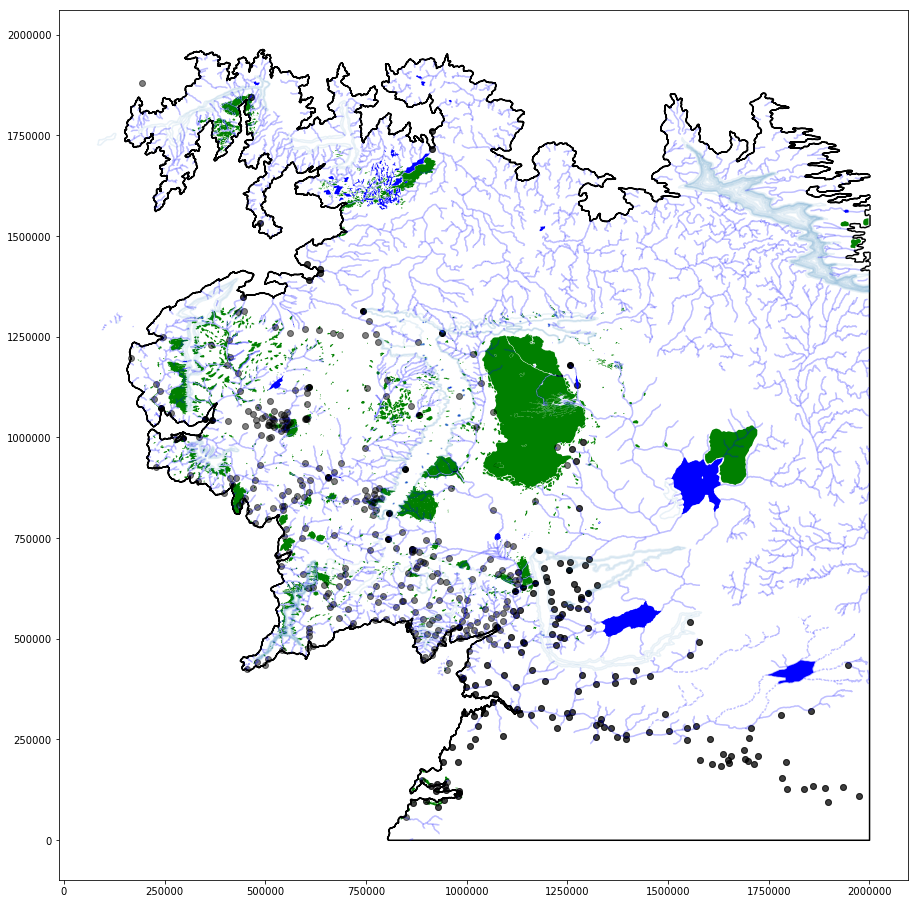

In [119]:
base = coasts.plot(color="black", figsize=(16,16))
cities.plot(ax=base, color="black")
forests.plot(ax=base, color="green")
towns.plot(ax=base, color="black", alpha=0.5)
lakes.plot(ax=base, color="blue")
contours[contours.Elevation > 1000].plot(ax=base, alpha=0.1)
rivers.plot(ax=base, color="blue", alpha=0.25)
base

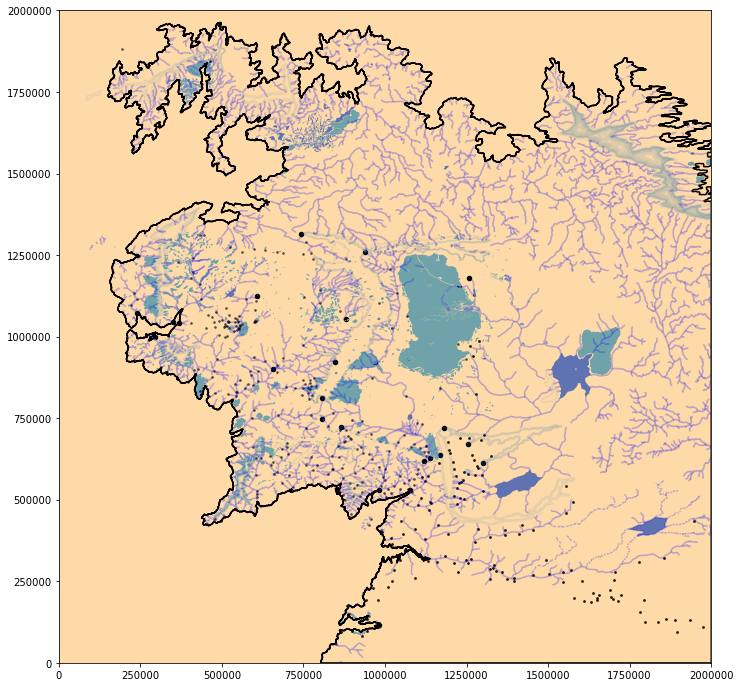

In [120]:
base = coasts.plot(color="black", figsize=(12,12))
base.patch.set_facecolor('#ffdaa9')
cities.plot(ax=base, color="black", markersize=20)
forests.plot(ax=base, color="#6fa3a9")
towns.plot(ax=base, color="black", alpha=0.5, markersize=3)
lakes.plot(ax=base, color="#5f72b2")
contours[contours.Elevation > 1000].plot(ax=base, alpha=0.1)
rivers.plot(ax=base, color="blue", alpha=0.25)
plt.xlim([25, 2000000])
plt.ylim([25, 2000000])
base
# plt.show()

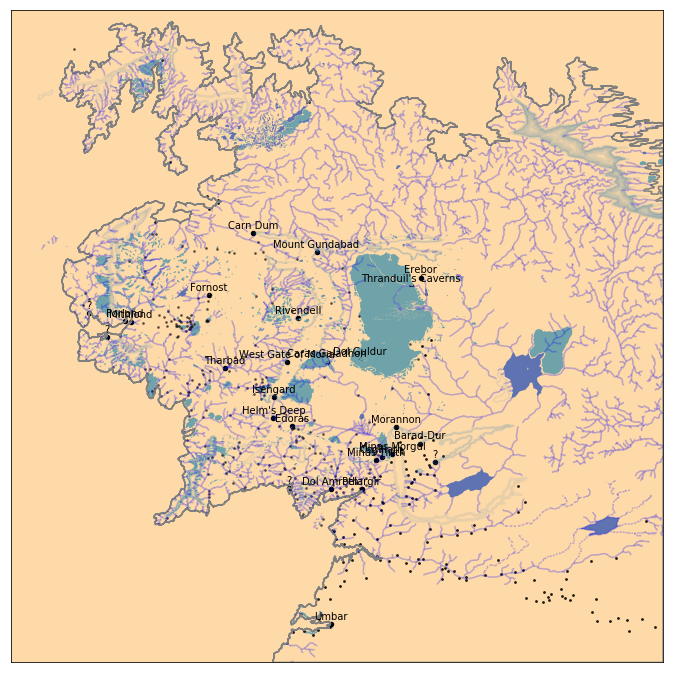

In [121]:
base = coasts.plot(color="grey", figsize=(12,12))
base.patch.set_facecolor('#ffdaa9')
cities.plot(ax=base, color="black", markersize=20)
forests.plot(ax=base, color="#6fa3a9")
towns.plot(ax=base, color="black", alpha=0.5, markersize=3)
lakes.plot(ax=base, color="#5f72b2")
contours[contours.Elevation > 1000].plot(ax=base, alpha=0.1)
rivers.plot(ax=base, color="blue", alpha=0.25)
plt.xlim([50, 2000000])
plt.ylim([50, 2000000])
for idx, row in cities.iterrows():
    name = row.Name if row.Name else '?'
    text_coords = [arr.tolist()[0] for arr in row.geometry.xy]
    text_coords[1] += 15000
    plt.annotate(s=name, xy=text_coords, horizontalalignment='center', size="medium")
base.xaxis.set_visible(False)
base.yaxis.set_visible(False)
# plt.savefig('middle_earth.png')
# plt.show()
base

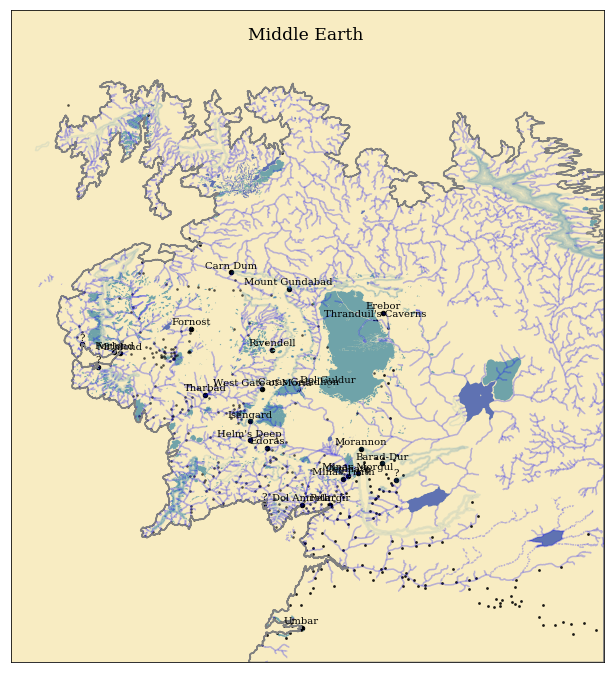

In [122]:
base = coasts.plot(color="grey", figsize=(12,12))
base.patch.set_facecolor('#F8ECC2')
cities.plot(ax=base, color="black", markersize=20)
forests.plot(ax=base, color="#6fa3a9")
towns.plot(ax=base, color="black", alpha=0.5, markersize=3)
lakes.plot(ax=base, color="#5f72b2")
contours[contours.Elevation > 1000].plot(ax=base, alpha=0.1)
rivers.plot(ax=base, color="blue", alpha=0.25)

plt.xlim([50, 2000000])
plt.ylim([50, 2200000])
for idx, row in cities.iterrows():
    name = row.Name if row.Name else '?'
    text_coords = [arr.tolist()[0] for arr in row.geometry.xy]
    text_coords[1] += 15000
    plt.annotate(s=name, xy=text_coords, horizontalalignment='center', size="medium", family="serif")
base.xaxis.set_visible(False)
base.yaxis.set_visible(False)
base.text(800000, 2100000, "Middle Earth", size="xx-large", family="serif")
base

### Finding the available fonts

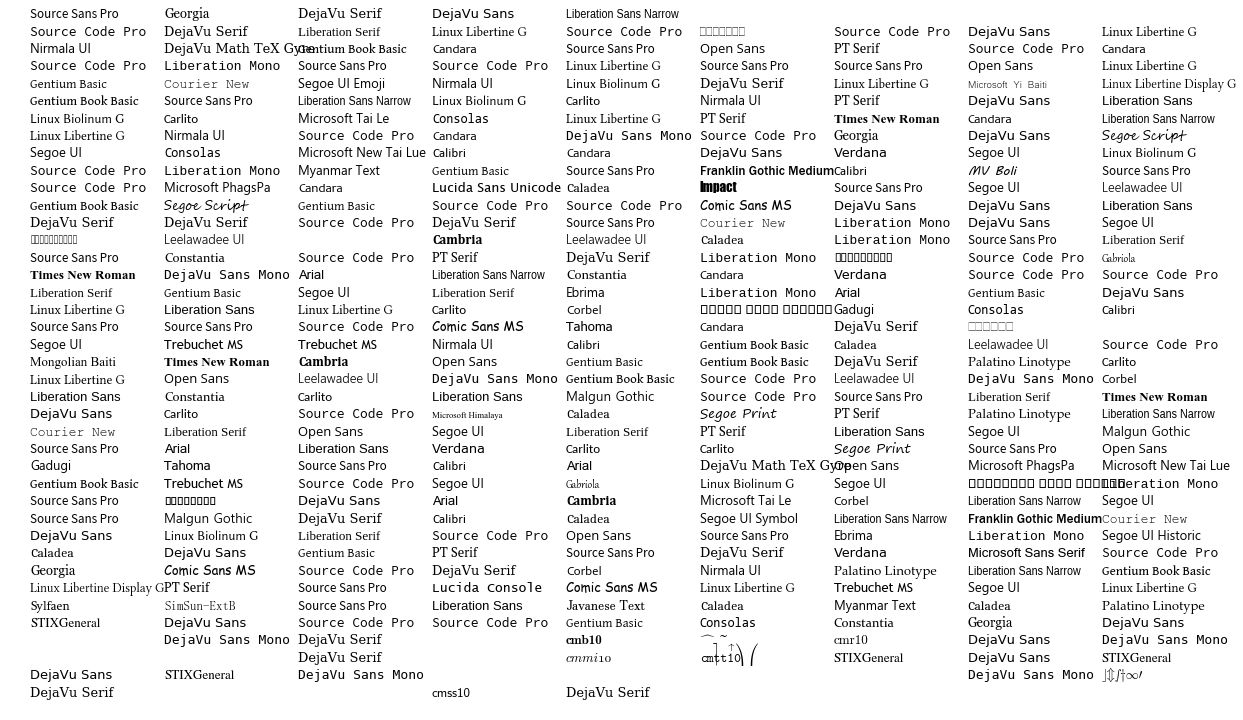

In [8]:
import matplotlib
font_manager = matplotlib.font_manager.FontManager()
available_fonts = [font.name for font in font_manager.ttflist]
fig = plt.figure()
ax = fig.add_subplot(111) # two rows, one column, first plot
ax.axis('off')

xi = 0
yi = 0
y_inc = 0.08
x_inc = y_inc * 5
for name in available_fonts[:1000]:
    ax.text(xi, yi, name, family=name, size=13)
    xi += x_inc
    if xi > x_inc * 8:
        xi = 0
        yi += y_inc
    if yi > y_inc * 50:
        print("overflowing for {}".format(name))
        break
base

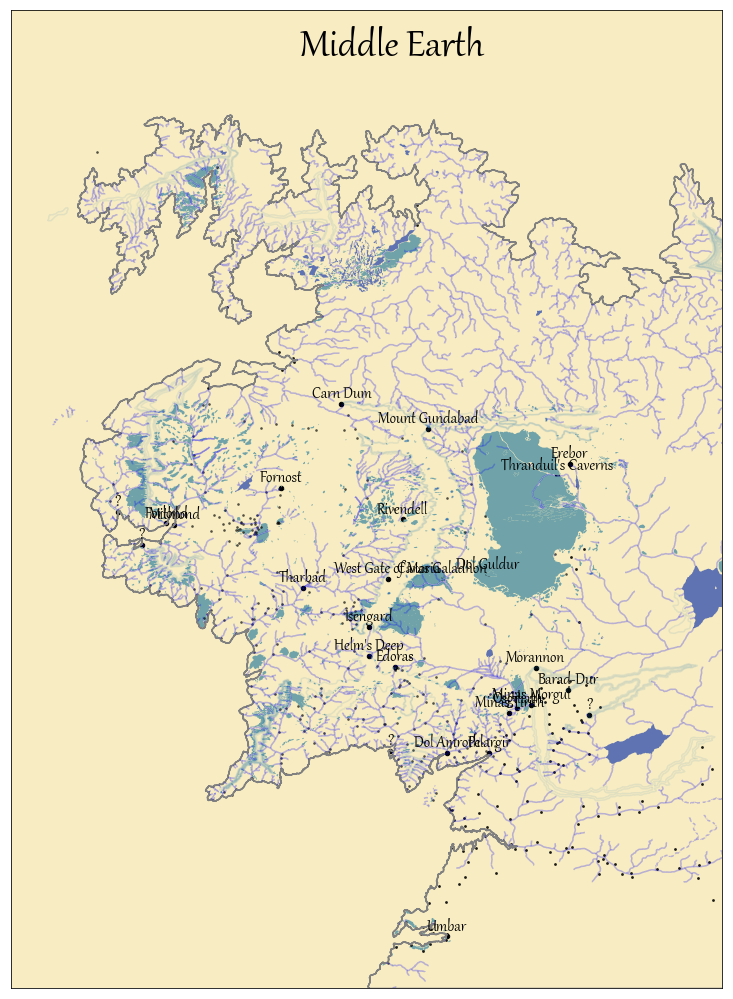

In [123]:
base = coasts.plot(color="grey", figsize=(18,18))
base.patch.set_facecolor('#F8ECC2')
cities.plot(ax=base, color="black", markersize=20)
forests.plot(ax=base, color="#6fa3a9")
towns.plot(ax=base, color="black", alpha=0.5, markersize=3)
lakes.plot(ax=base, color="#5f72b2")
contours[contours.Elevation > 1000].plot(ax=base, alpha=0.1)
rivers.plot(ax=base, color="blue", alpha=0.25)

plt.xlim([50, 1600000])
plt.ylim([50, 2200000])
for idx, row in cities.iterrows():
    name = row.Name if row.Name else '?'
    text_coords = [arr.tolist()[0] for arr in row.geometry.xy]
    text_coords[1] += 15000
    plt.annotate(s=name, xy=text_coords, horizontalalignment='center', size=18, family="Gabriola")
base.xaxis.set_visible(False)
base.yaxis.set_visible(False)
base.text(650000, 2100000, "Middle Earth", size=45, family="Gabriola")
base

### Stochastic, single-axis automatic label layout

So we still need to deal with those annoying overlapping labels. Admittedly, there are only 27 different city names, so we could just manually position them. But let's try for a more generalizable solution. We could do a kind of [force-directed layout](https://en.wikipedia.org/wiki/Force-directed_graph_drawing), which gives each node (city label) the property of repulsing other nodes while also being anchored to the actual city location. It's an excellent solution, but we can get away with something even simpler here.

We can eliminate most of the overlapping by taking a few of the labels and moving them slightly up or down. So if we only paid attention to the y-axis and tried to get it so that labels weren't within a certain distance of each other in only that dimension, then we could get a lot of the way there and it might look good enough for our purposes.

So in the following code, we'll define a new column that keeps track of the y coordinates of the text label. If does a diff on that Series, which will detect when a given label has a y value close to the previous entry. Then we iterate over each of those too-close labels and randomly move it up or down some amount (and reset it if it moves too far). We keep iterating over that until we reach a certain value that, in testing, is pretty much as good as we'll get. But have a look below--this actually comes out surprisingly well, and all the labels are at least legible.

In [124]:
cities['text_y'] = cities.geometry.map(lambda point: point.y + 1500)
cities[["Name", "text_y"]].sort_values(by="text_y")
labels_close = cities.text_y.diff() < 25000
iterations = 0
while labels_close.sum() > 10:
#     print(labels_close.sum(), end=" ")
    iterations += 1
    for i in range(len(cities)):
        if labels_close[i]:
            mult = np.random.random() - 0.5
            if abs(cities.loc[i, ("text_y")] - cities.loc[i].geometry.y) < 200000:
                cities.loc[i, ("text_y")] += 20000 * mult
            else:
                cities.loc[i, ("text_y")] = (cities.loc[i].geometry.y + cities.loc[i, ("text_y")]) / 2
                
    labels_close = cities.text_y.diff() < 25000
print("iterations:", iterations)

13 13 13 13 13 12 13 12 13 12 12 12 12 12 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 13 14 13 13 13 13 13 13 13 14 13 13 13 13 12 13 11 12 12 12 12 11 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 12 11 11 11 11 11 12 12 12 11 12 12 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 11 11 12 12 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 13 14 12 13 14 14 14 14 1

Now we'll go through all that plotting again, using the new y coordinates for the text that we just generated.

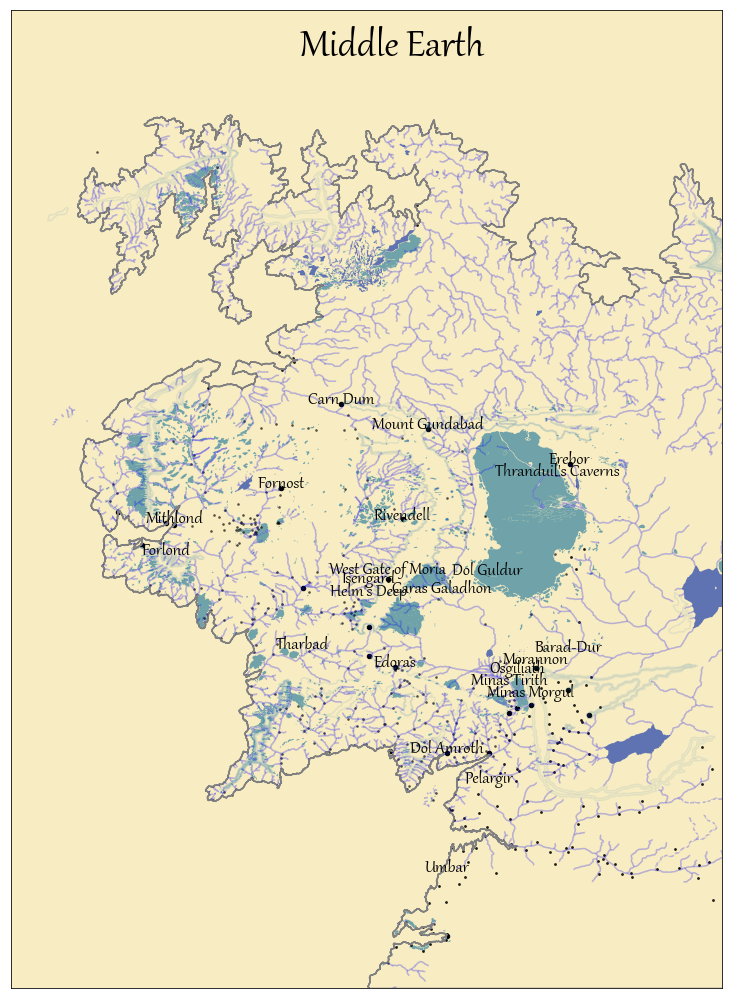

In [162]:
base = coasts.plot(color="grey", figsize=(18,18))
base.patch.set_facecolor('#F8ECC2')
cities.plot(ax=base, color="black", markersize=20)
forests.plot(ax=base, color="#6fa3a9")
towns.plot(ax=base, color="black", alpha=0.5, markersize=3)
lakes.plot(ax=base, color="#5f72b2")
contours[contours.Elevation > 1000].plot(ax=base, alpha=0.1)
rivers.plot(ax=base, color="blue", alpha=0.25)

plt.xlim([50, 1600000])
plt.ylim([50, 2200000])
for idx, row in cities.iterrows():
    name = row.Name if row.Name else ''
    text_coords = [row.geometry.x, row.text_y]
    plt.annotate(s=name, xy=text_coords, horizontalalignment='center', size=20, family="Gabriola")

base.xaxis.set_visible(False)
base.yaxis.set_visible(False)
base.text(650000, 2100000, "Middle Earth", size=45, family="Gabriola")
base

Awesome! Let's put in some finishing text, a Tolkien quote, and call it good.

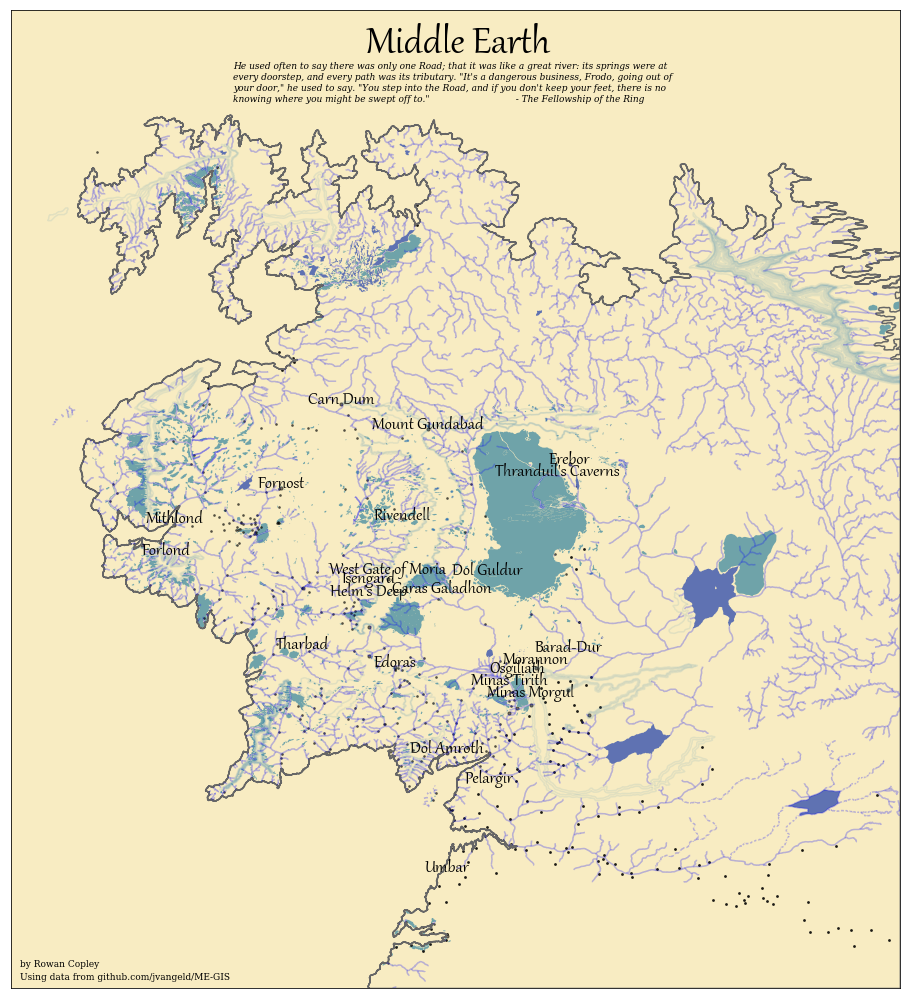

In [161]:
base = coasts.plot(color="#666666", figsize=(18,18))
base.patch.set_facecolor('#F8ECC2')
cities.plot(ax=base, color="black", markersize=10, alpha=0.5)
forests.plot(ax=base, color="#6fa3a9")
towns.plot(ax=base, color="black", alpha=0.5, markersize=3)
lakes.plot(ax=base, color="#5f72b2")
contours[contours.Elevation > 1000].plot(ax=base, alpha=0.1)
rivers.plot(ax=base, color="blue", alpha=0.25)

plt.xlim([50, 2000000])
plt.ylim([50, 2200000])
for idx, row in cities.iterrows():
    name = row.Name if row.Name else ''
    text_coords = [row.geometry.x, row.text_y]
    plt.annotate(s=name, xy=text_coords, horizontalalignment='center', size=20, family="Gabriola")
base.xaxis.set_visible(False)
base.yaxis.set_visible(False)
base.text(800000, 2105000, "Middle Earth", size=45, family="Gabriola")
base.text(20000, 50000, "by Rowan Copley", size=9, family="serif")
base.text(20000, 20000, "Using data from github.com/jvangeld/ME-GIS", size=9, family="serif")
start_quote = 2070000
quote_spacing = 25000
quote = (
    'He used often to say there was only one Road; that it was like a great river: its springs were at ',
    'every doorstep, and every path was its tributary. "It\'s a dangerous business, Frodo, going out of',
    'your door," he used to say. "You step into the Road, and if you don\'t keep your feet, there is no ',
    'knowing where you might be swept off to."                              - The Fellowship of the Ring'
)
for i in range(len(quote)):
    base.text(500000, start_quote - quote_spacing * i, quote[i], family="serif", style="italic", size=9)

plt.savefig('images/middle_earth.png', bbox_inches="tight")